来源：https://wiseodd.github.io/techblog/2015/10/09/gibbs-sampling/

## 介绍

Gibbs Sampling是一种MCMC方法，从一个复杂的高维分布中采样（只要你能给出该联合分布的条件分布的解析式）。

## 代码例子

假设现在要估计一个二维高斯分布P(x,y)，其均值向量为[5,5]，协方差矩阵为[[1,0.9],[0.9,1]]。

要想使用Gibbs Sampling，就要知道所以的条件分布。这里就要知道P(x|y)和P(y|x)。可以参考http://fourier.eng.hmc.edu/e161/lectures/gaussianprocess/node7.html 。

In [1]:
import numpy as np
import seaborn as sns

In [2]:
"""
    输入二维高斯分布的参数mus和sigmas，即某维的值
    输出另一维的分布
"""

def p_x_given_y(y, mus, sigmas):
    mu = mus[0] + sigmas[1, 0] / sigmas[0, 0] * (y - mus[1])
    sigma = sigmas[0, 0] - sigmas[1, 0] / sigmas[1, 1] * sigmas[1, 0]
    return np.random.normal(mu, sigma)


def p_y_given_x(x, mus, sigmas):
    mu = mus[1] + sigmas[0, 1] / sigmas[1, 1] * (x - mus[0])
    sigma = sigmas[1, 1] - sigmas[0, 1] / sigmas[0, 0] * sigmas[0, 1]
    return np.random.normal(mu, sigma)

In [3]:
def gibbs_sampling(mus, sigmas, iterations):
    samples = np.zeros((iterations, 2))
    y = np.random.rand() * 10

    for i in range(iterations):
        # 下面实际上是经过两步转移得到新的样本
        # 每一步都是沿平行于坐标轴的方向移动
        # 由推导可知这样的移动满足细致平稳条件
        x = p_x_given_y(y, mus, sigmas)
        y = p_y_given_x(x, mus, sigmas)
        samples[i, :] = [x, y]

    return samples

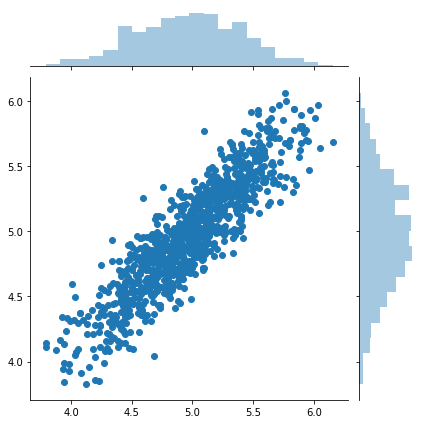

In [11]:
mus = np.array([5, 5])
sigmas = np.array([[1, .9], [.9, 1]])

samples = gibbs_sampling(mus, sigmas, 1000)
sns.jointplot(samples[:, 0], samples[:, 1])

在有了这些样本后，便可以来计算一些数值的结果，比如分布的积分，均值，中值等等。